In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import  seaborn as sns

In [70]:
url=r'https://drive.google.com/file/d/1Jn1ZZTMC2KI_T08DdUxoIvI4wQAdJwVw/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataset= pd.read_csv(path)
#dataset.info()
#print(dataset)
dataset.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [50]:
dataset.isnull().sum()
dataset.shape

(918, 12)

In [30]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
#dataset.head

In [31]:
missing_value_per = dataset.isnull().sum()/dataset.shape[0]*100
missing_value_per

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [69]:
#select only int64 and float64 numeic data no categorical data
dataset_num = dataset.select_dtypes(include=['int64','float64'])
dataset_num.head()
#dataset.shape

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


<AxesSubplot:>

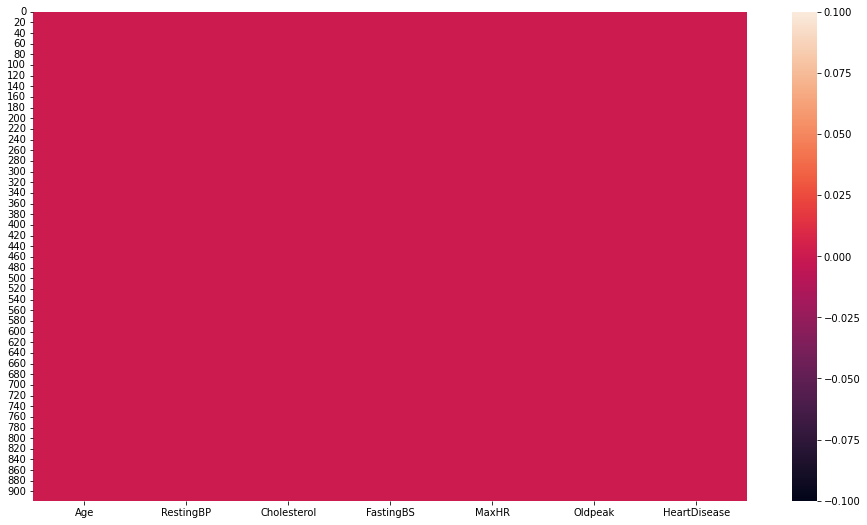

In [52]:
#Plot heatmap
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull())


In [55]:
dataset[dataset.isnull().any(axis=1)]


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease


In [57]:
# select col missing value variable missing value

missing_value_per = [var for var in dataset.columns if dataset[var].isnull().sum()>0]
missing_value_per

[]

In [58]:
#mean and median
# to see data distribution 
plt.figure(figsize=(10,10))
sns.set()
for i , var in enumerate(missing_value_per):
    plt.subplot(2,2,i+1)
    sns.displot(dataset[var],bins=[20] , kde_kws={'linewidth':5})

<Figure size 720x720 with 0 Axes>

In [60]:
dataset_mean=dataset.fillna(dataset.mean())
dataset_mean.isnull().sum().sum()

0

In [74]:
dummy_var=pd.get_dummies(dataset)    # k-dummy variable , as many classes in categorical 
dummy_var.head(8)
#dummy_var.shape # 21 columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0.0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
7,54,110,208,0,142,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1


In [ ]:
#give parameter to dummy varibale
pd.get_dummies(
    data,
    prefix=None
    dtype=None
)

In [77]:
# k-1 dummy variable
dummy_var2=pd.get_dummies(dataset , drop_first=True)
dummy_var2.head(5)
dummy_var2.shape  # now 16 col

(918, 16)

OneHotEncoder

In [90]:
from sklearn.preprocessing import OneHotEncoder
one_hot =OneHotEncoder(sparse=False)

encoder_col=one_hot.fit_transform(dataset[['ChestPainType','RestingECG','ST_Slope']])

# get data in numpy array 
#and this numpy araay convert into datafram
#while we use pd.getdummies we get direct Dataframe

encoder_arr=pd.DataFrame(encoder_col,columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       ])

encoder_arr.head(5)

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [86]:
dataset.keys()
#dummy_var2.keys()


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')